# Project 02: Summer Clothes Sales EDA

1. Data source: https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish
2. Data description
    1. The data comes from the e-commerce platform, Wish.
    2. The products listed in the dataset are the ones that would appear if you type "summer" in the search field of the platform. The data was scraped in the french localisation (hence some non-ascii latin characters such as « é » and « à ») in the title column.
    3. This dataset contains product listings as well as products ratings and sales performance, which you would not find in other datasets.
    4. In the following screenshot, you see some features and how to interpret them.
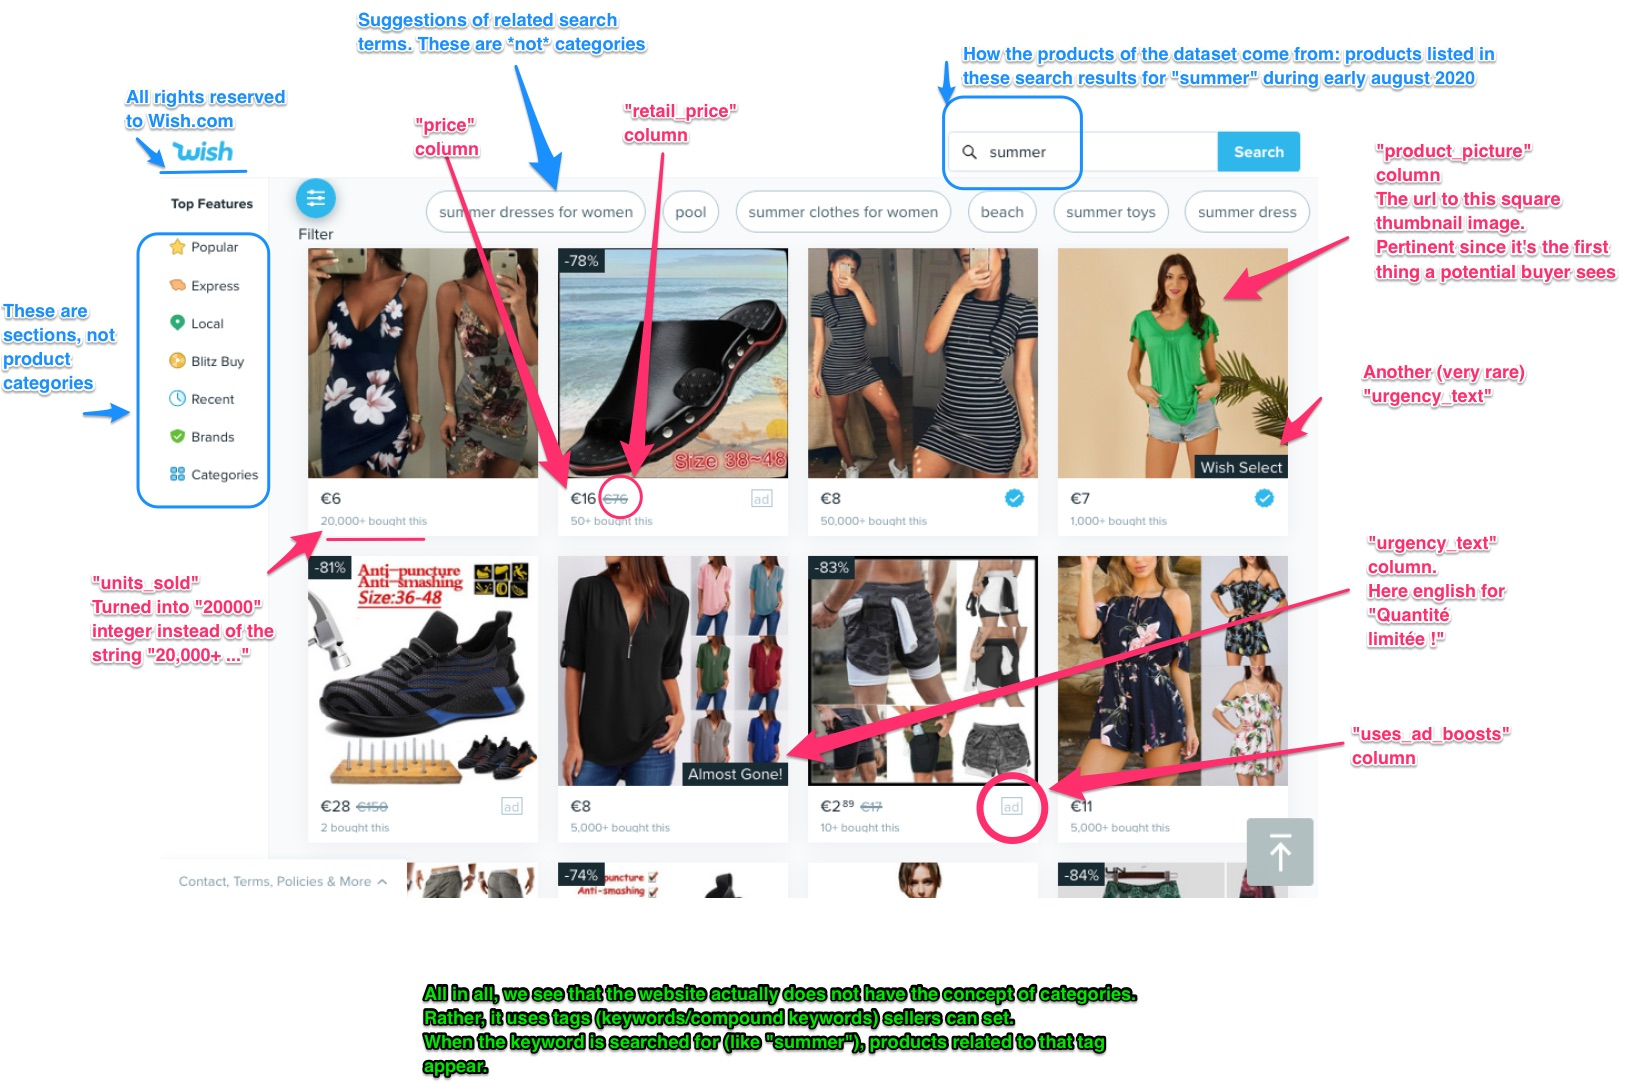
3. Project goals:
    1. identify the features that significantly affect the product sale success.
    2. practice basic Python programming for EDA and statistical analysis.
4. Table of Contents
    1. Understanding variables and data types
    2. Cleaning Dataset
        1. Missing value treatments
        2. Variable selection
    3. Grphical Analysis
        1. Pricing
        2. Categorical variables
        3. Ratings
        4. Merchant factors

## 1. Understanding variables and data types

In [1]:
# Import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

In [2]:
# Define working directory
os.chdir('C:/Users/james/Desktop/Coding/Kaggle/Summer Clothes Sales')

In [3]:
# Import original data (csv file)
summer = pd.read_csv('summer_products.csv')

# Print top five observations
summer.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
# Data information
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
# Check null values, data type, and unique values in each column

null = summer.isnull().sum().to_frame(name='nulls').T
dtype = summer.dtypes.to_frame(name='dtypes').T
nunique = summer.nunique().to_frame(name='unique').T
pd.concat([null, dtype, nunique], axis=0)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
nulls,0,0,0,0,0,0,0,0,0,45,...,0,0,0,0,1347,0,0,0,0,0
dtypes,object,object,float64,int64,object,int64,int64,float64,int64,float64,...,int64,float64,object,int64,object,object,object,object,object,object
unique,1201,1203,127,104,1,15,2,192,761,605,...,917,952,958,2,125,1341,1341,1341,1,1


In [6]:
# Statistic summary for continuous variables
summer.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


## 2. Cleaning Dataset
### 2.1 Missing value treatments

In [7]:
# Detect the total number of missing values in each column
summer_nullity = summer.isnull().sum()
print(summer_nullity)

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

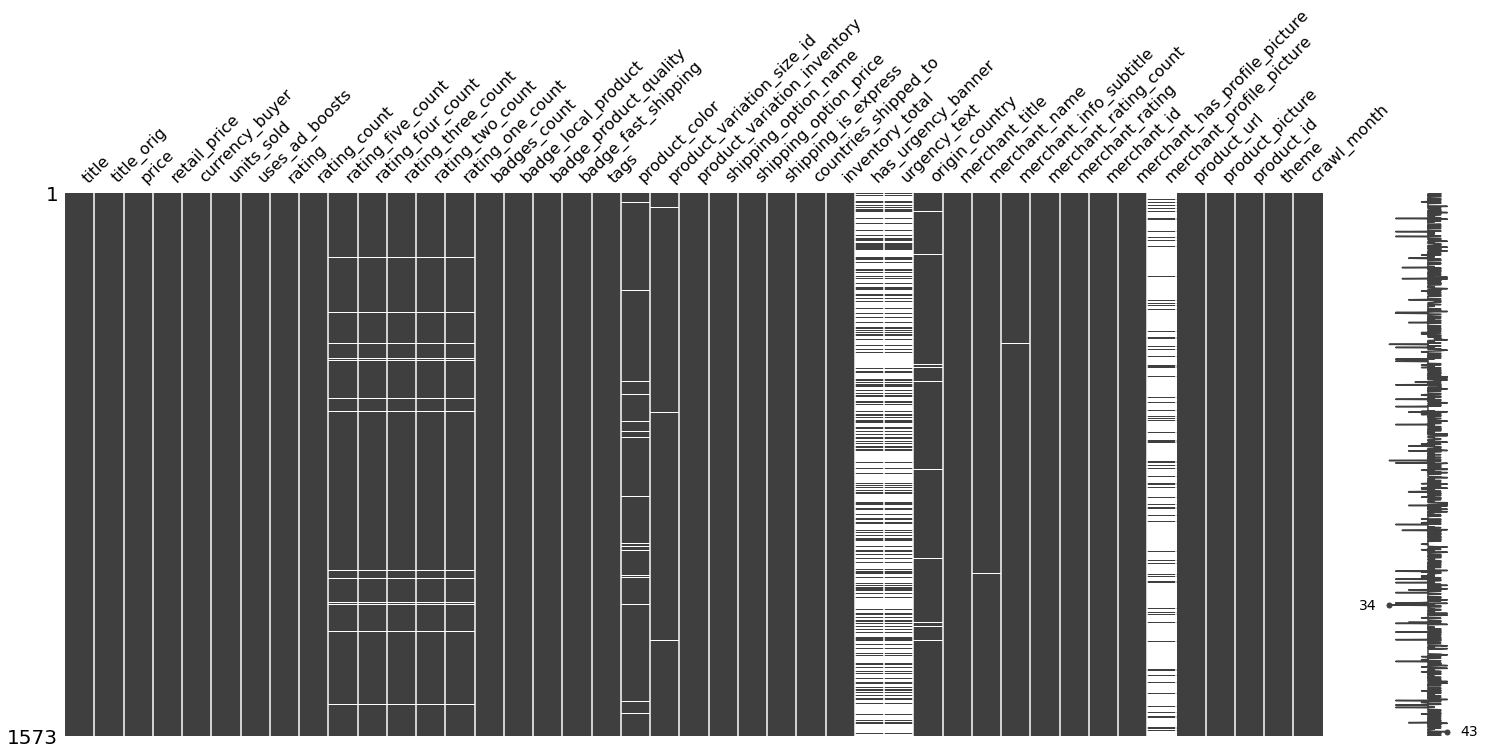

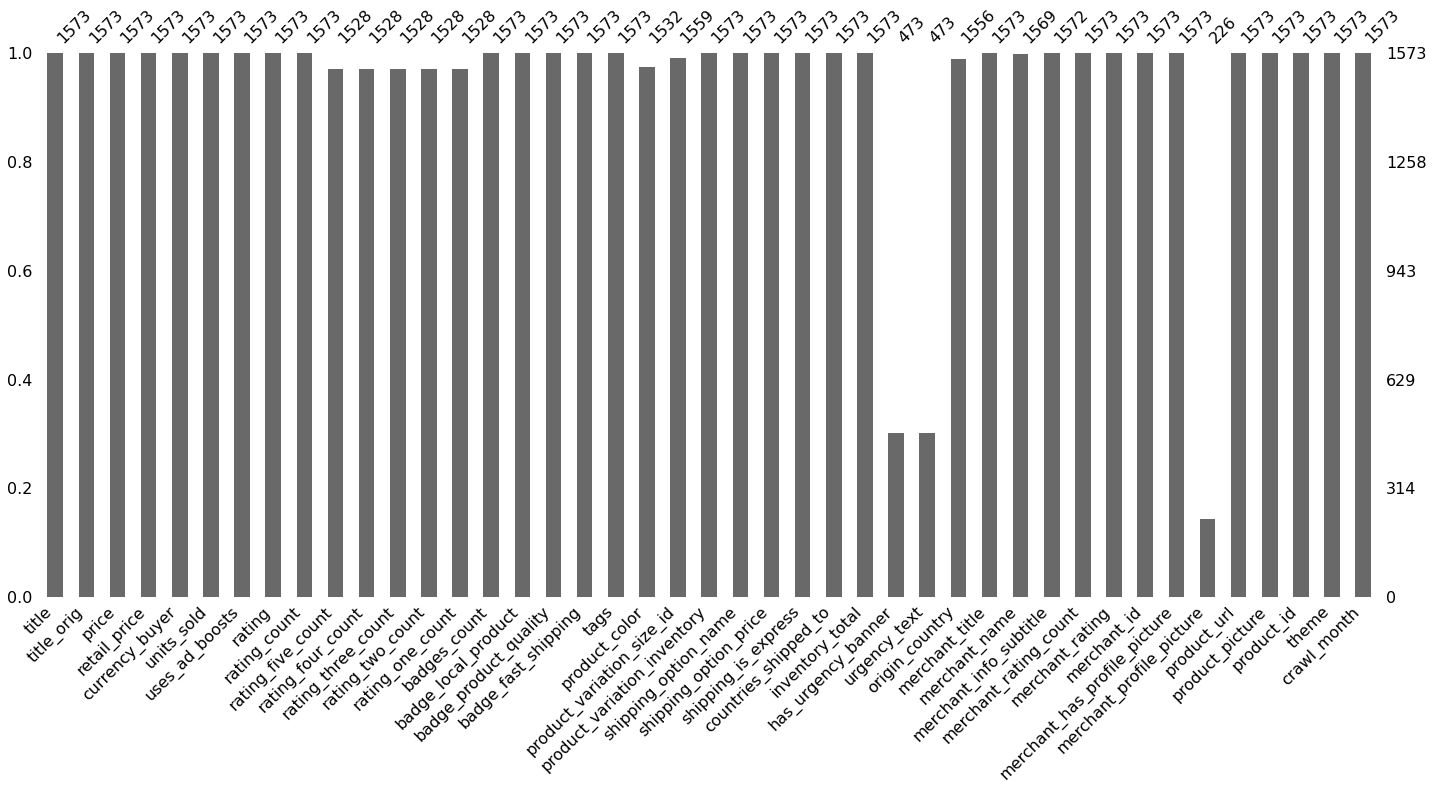

In [8]:
# Visualize missing values 
# (1): as a matrix
msno.matrix(summer)
plt.show()

# (2): as a bar
msno.bar(summer)
plt.show()

Looking at the missing value matrix, there seems to be correlation among rating_#_count and between has_urgency_banner and urgency_text. With further examinations, it will be easier to determine which variables having missing values should stay or be dropped.

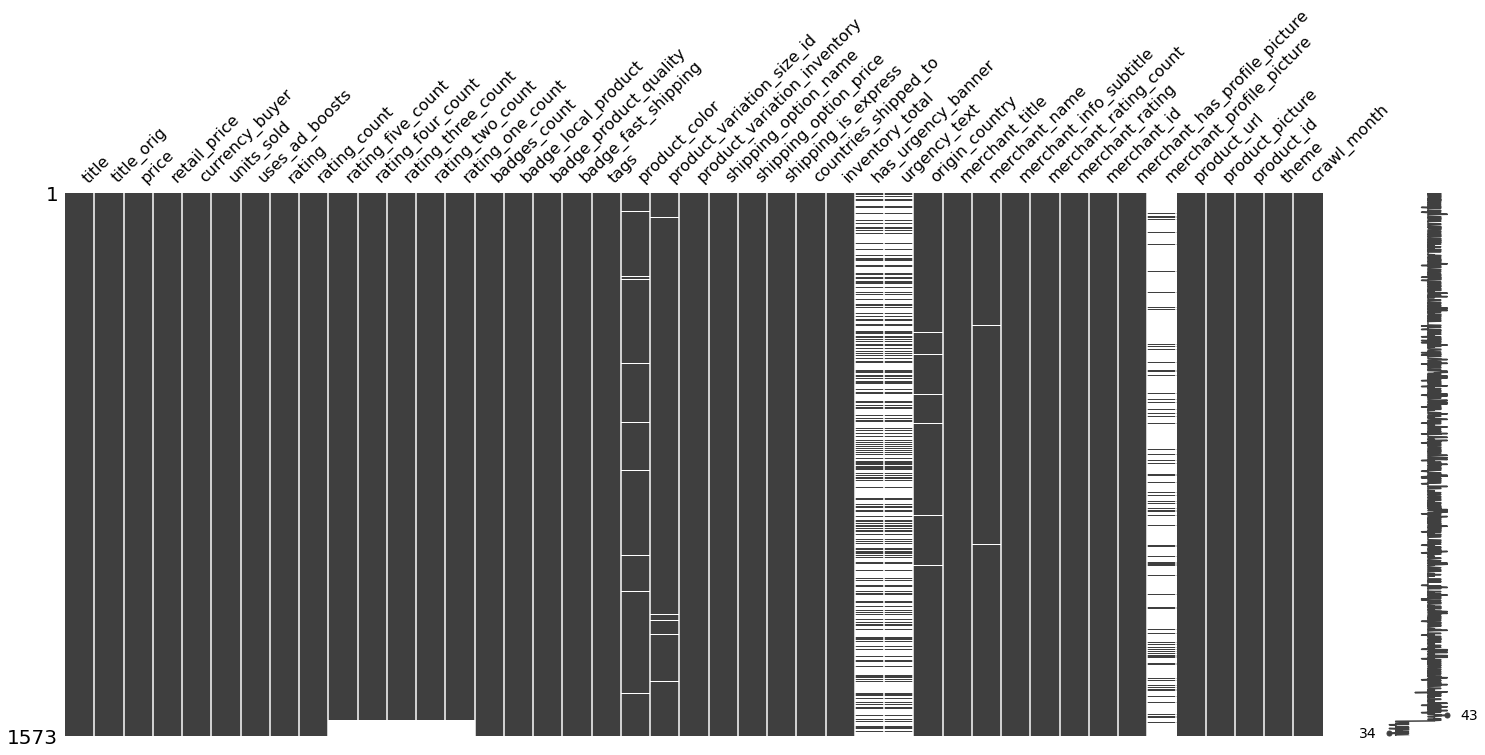

In [9]:
# Missing patterns of dataset sorted by 'rating_#_count'
rating_sorted = summer.sort_values('rating_five_count')
msno.matrix(rating_sorted)
plt.show()

It seems that all missing values in each rating_#_count are Missing not at Random (MNAR), meaning there is relationship between missingness and its value, mission or non-missing.

Eventhough rating_count is the sum of values of each rating_#_count, the rating_count columns that have missing values in each rating_#_count do not have any missing values as total. So, it is necessary to replace these values in rating_count column with 0.

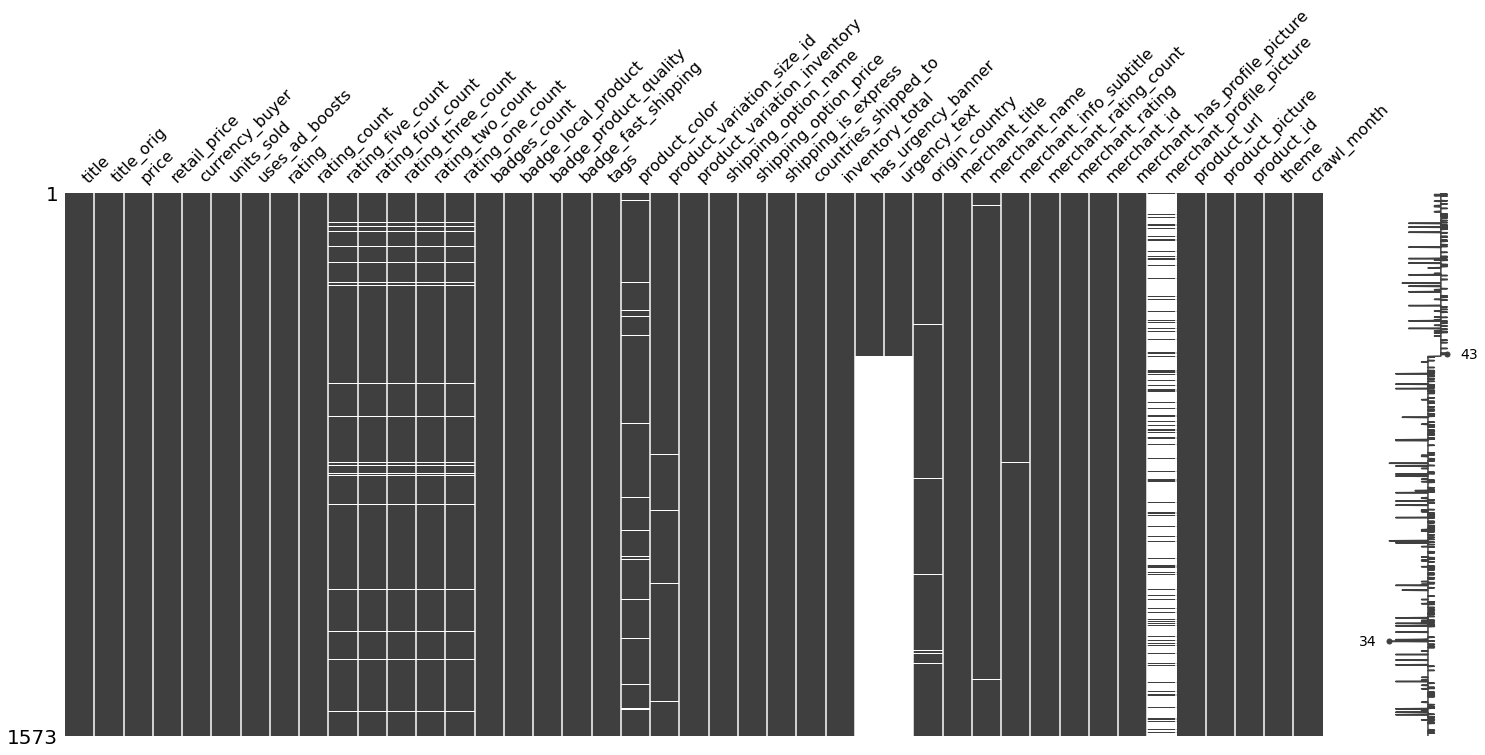

In [10]:
# Missing Patterns of the dataset sorted by 'has_urgency_banner'
urgency_sorted = summer.sort_values('has_urgency_banner')
msno.matrix(urgency_sorted)
plt.show()

It seems that all missing values in has_urgency_banner and urgency_text are also MNAR. It is necessary to replace all these missing values with 0.

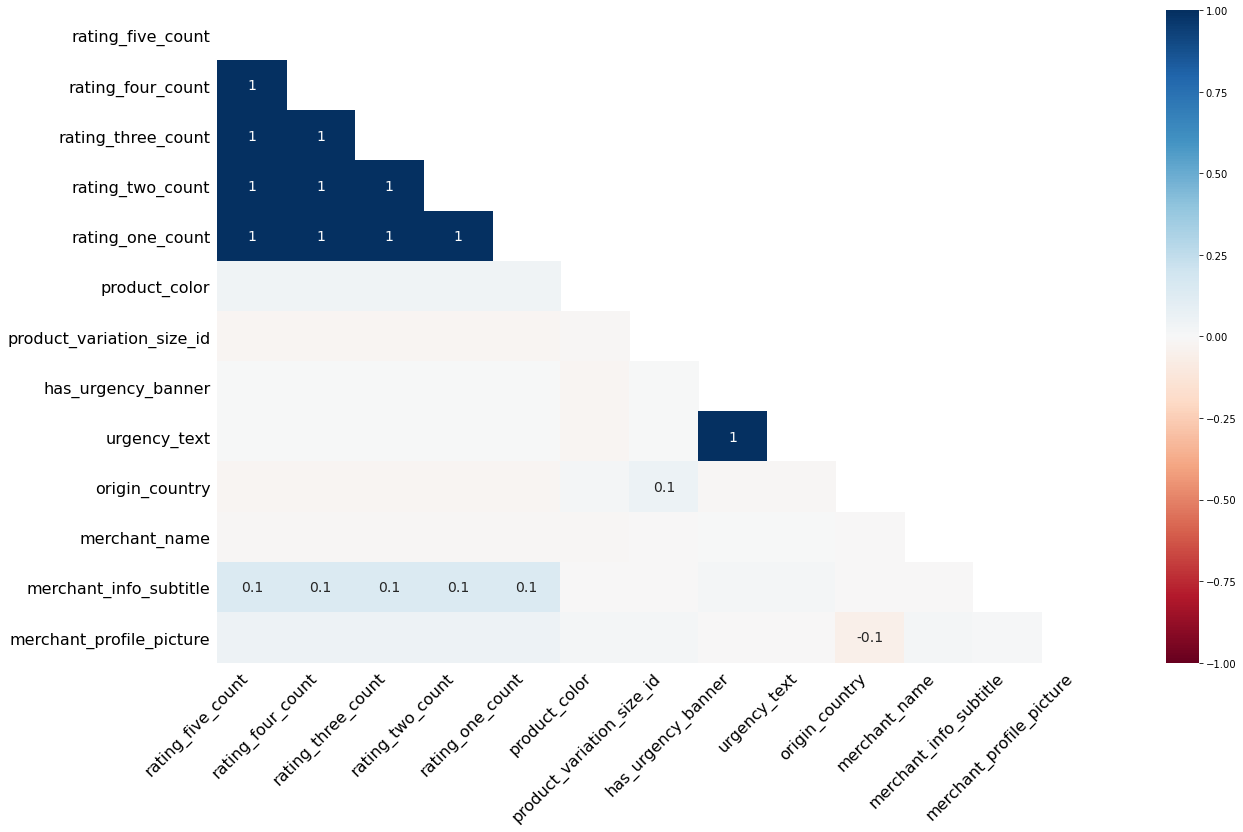

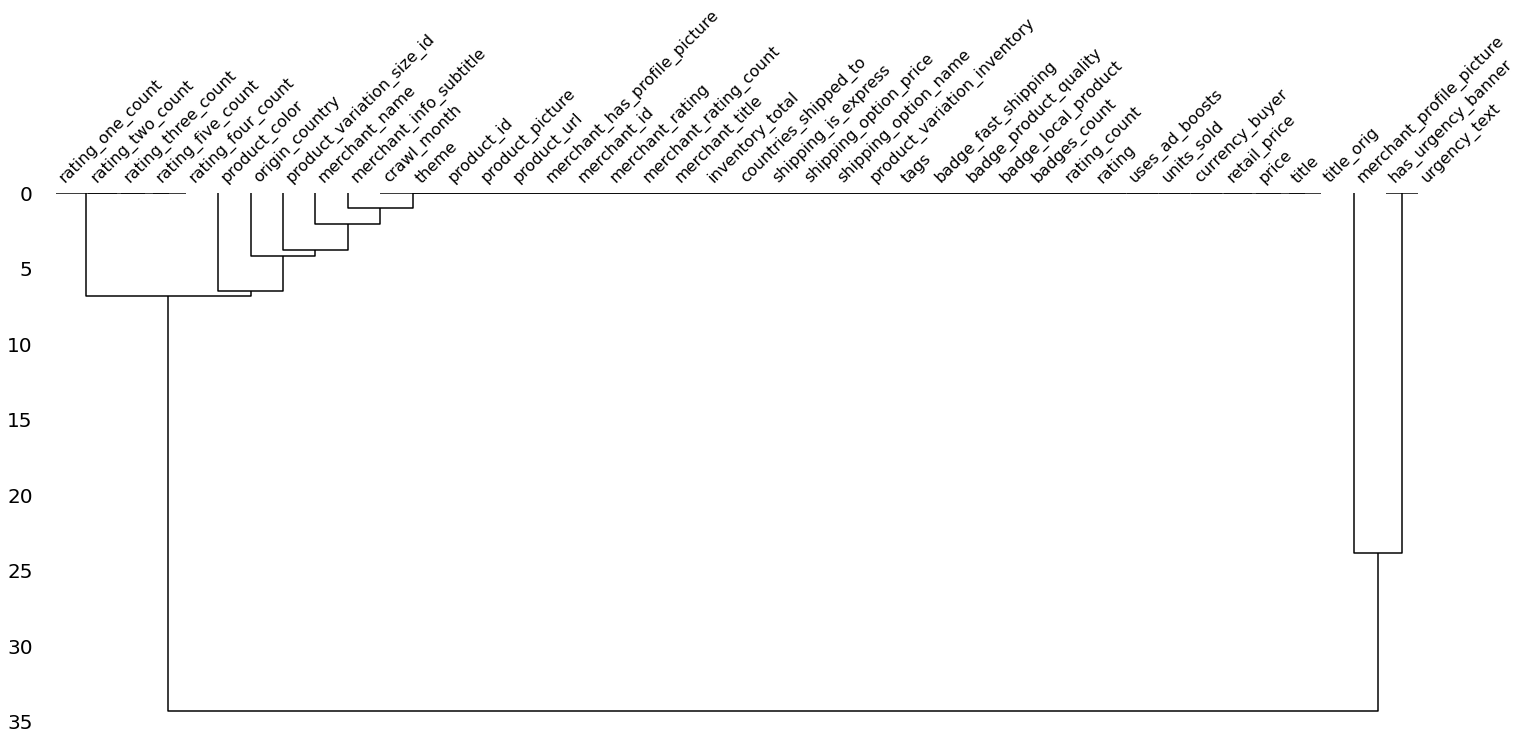

In [11]:
# Visualize the correlation between the number of missing values in different columns 
# (1) as a heatmap 
msno.heatmap(summer)
plt.show()

#(2) as a dendrogram
msno.dendrogram(summer)
plt.show()

In the heatmap, a value near 1 means if one variable appears then the other variable is very likely to be present, meaning that if one variable appears in one of the rating_#_count columns, the other variable is highly likely to be present in the other rating_#_count.

The same interpretation applies to those two columns, has_urgency_banner and urgency_text.

In [12]:
# Subset multiple columns
summer[["has_urgency_banner", "urgency_text"]]

,has_urgency_banner,urgency_text
0,1.0,Quantité limitée !
1,1.0,Quantité limitée !
2,1.0,Quantité limitée !
3,NaN,NaN
4,1.0,Quantité limitée !
...,...,...
1568,NaN,NaN
1569,1.0,Quantité limitée !
1570,NaN,NaN
1571,NaN,NaN


In [13]:
# Count the values of the column has_urgency_banner
summer["has_urgency_banner"].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

In [14]:
# Count the values of the column urgency_text
summer["urgency_text"].value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [15]:
# Check if the missing values in both columns match
print(summer.loc[summer["has_urgency_banner"].isna(), "urgency_text"].unique())

# Check if the non-missing values in both columns match
print(summer.loc[~summer["has_urgency_banner"].isna(), "urgency_text"].unique())

[nan]
['Quantité limitée !' 'Réduction sur les achats en gros']


It seems that the value of 1 in has_urgency_banner means a product has an urgent text on it, which is either 'Limited Quantity!' or 'Discount on wholesale purchases'. Since both columns are higly related and convey the same information, it is desirable to delete the column, urgency_text.

In [16]:
# Removing the column urgency_text
summer.drop(["urgency_text"], axis=1, inplace=True)

# Data imputation
# Re-defining the column has_urgency_banner and fill the missig values with 0
summer["has_urgency_banner"] = summer["has_urgency_banner"].fillna(0)

# Confirm changes made
summer["has_urgency_banner"]

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1568    0.0
1569    1.0
1570    0.0
1571    0.0
1572    0.0
Name: has_urgency_banner, Length: 1573, dtype: float64

In [17]:
# Group columns related to rating and define as rating_cols
rating_cols = ["rating", "rating_count", "rating_five_count", "rating_four_count", 
               "rating_three_count", "rating_two_count", "rating_one_count"]

# Define no_vote as the columns that have missing values
no_vote = summer.loc[summer[rating_cols].isna().any(axis=1), rating_cols]

# Set the value of 0 to each section that has missing values 
summer.loc[no_vote.index, rating_cols] = 0

# Print top five obs
summer.loc[no_vote.index, rating_cols].head()

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
74,0.0,0,0.0,0.0,0.0,0.0,0.0
112,0.0,0,0.0,0.0,0.0,0.0,0.0
126,0.0,0,0.0,0.0,0.0,0.0,0.0
189,0.0,0,0.0,0.0,0.0,0.0,0.0
216,0.0,0,0.0,0.0,0.0,0.0,0.0


Now all rows that once had missing values in each rating_#_count column have the value of 0 in every column. 

### 2.2 Variable selection

In [18]:
# Remove unimportant variables or variables that have a few missing values
drop_cols = ["title", "currency_buyer", "tags", "product_color", "product_variation_size_id", 
             "product_variation_inventory", "shipping_option_name", "shipping_is_express", 
             "countries_shipped_to", "inventory_total", "origin_country", "merchant_title", 
             "merchant_name", "merchant_info_subtitle", "merchant_id", "merchant_profile_picture",
             "product_url", "product_picture", "product_id", "theme", "crawl_month"]

summer.drop(drop_cols, axis=1, inplace=True)
print(summer.columns)

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'shipping_option_price', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')


In [19]:
# Remove duplicate rows - if any
summer.drop_duplicates(keep='first', inplace=True)

## 3. Graphical Analysis

The main goal here is to carry out a graphical univariate or multivariate analysis between major predictor variables and bewteen response variable; units_sold and other predictor variables.

### 3.1 Pricing: price, retail_price, shipping_option_price

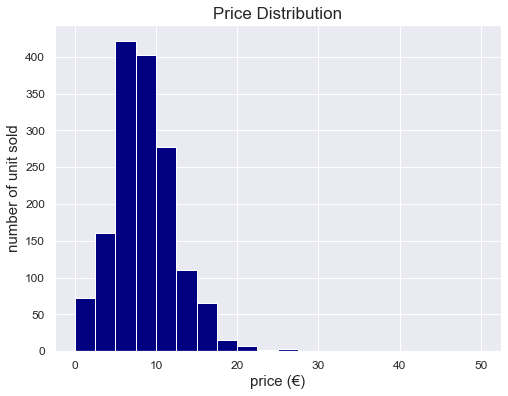

In [20]:
# Histogram for price

sns.set()
plt.figure(figsize=(8, 6))
plt.hist(summer['price'], bins=20, facecolor='navy', range=[0, 50])
plt.xlabel("price (€)", fontsize=15)
plt.ylabel("number of unit sold", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Price Distribution", fontsize=17)
plt.show()

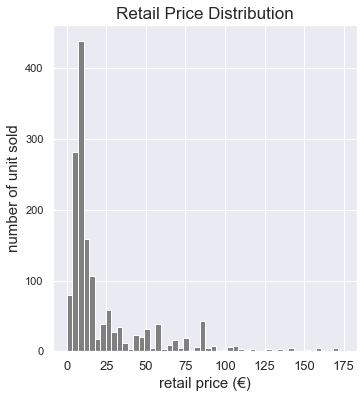

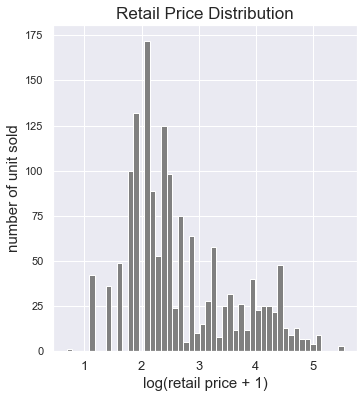

In [21]:
# Histogram for retail price

plt.subplot(1, 2, 1)
(summer['retail_price']).plot.hist(bins=50, figsize=(12, 6), facecolor='gray', range=[0, 175])
plt.xlabel("retail price (€)", fontsize=15)
plt.ylabel("number of unit sold", fontsize=15)
plt.title("Retail Price Distribution", fontsize=17)
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

plt.subplot(1, 2, 2)
np.log(summer['retail_price']+1).plot.hist(bins=50, figsize=(12, 6), facecolor='gray')
plt.xlabel("log(retail price + 1)", fontsize=15)
plt.ylabel("number of unit sold", fontsize=15)
plt.title("Retail Price Distribution", fontsize=17)
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

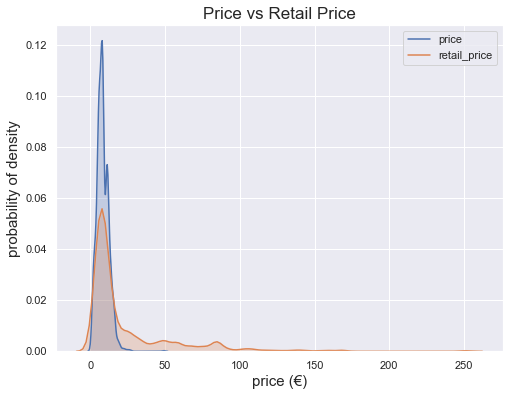

In [22]:
# Kernel Density Estimates (KDE) for both prices

plt.figure(figsize=(8, 6))
sns.kdeplot(summer['price'], shade=True)
sns.kdeplot(summer['retail_price'], shade=True)
plt.xlabel('price (€)', fontsize=15)
plt.ylabel('probability of density', fontsize=15)
plt.title("Price vs Retail Price", fontsize=17)
plt.show()

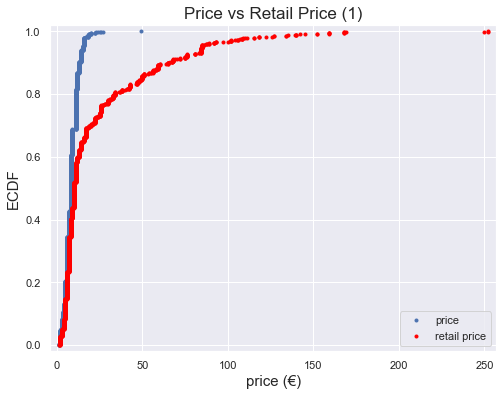

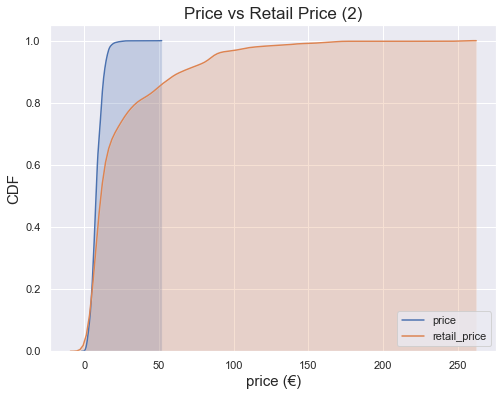

In [23]:
# Plot data using Empirical Cumulative Distribution Function (ECDF)
# Compute and define ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Plot ECDFs and Comparison of ECDFs
x_pri, y_pri = ecdf(summer['price'])
x_re_pri, y_re_pri = ecdf(summer['retail_price'])

plt.figure(figsize=(8, 6))
plt.plot(x_pri, y_pri, marker='.', linestyle='none')
plt.plot(x_re_pri, y_re_pri, marker='.', linestyle='none', color='red')

plt.legend(('price', 'retail price'), loc='lower right')
plt.xlabel('price (€)', fontsize=15)
plt.ylabel('ECDF', fontsize=15)
plt.title("Price vs Retail Price (1)", fontsize=17)
plt.margins(0.02) # Keep data off plot edges
plt.show()

# Produce CDF using Seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(summer['price'], shade=True, cumulative=True)
sns.kdeplot(summer['retail_price'], shade=True, cumulative=True)
plt.xlabel('price (€)', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.title("Price vs Retail Price (2)", fontsize=17)
plt.show()

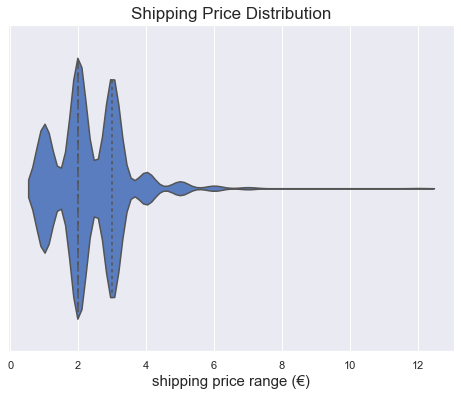

In [24]:
# Check the distribution of shipping_option_price

plt.figure(figsize=(8, 6))
sns.violinplot('shipping_option_price', data=summer, palette='muted', 
               scale='count', inner='quartile')
plt.xlabel('shipping price range (€)', fontsize=15)
plt.title('Shipping Price Distribution', fontsize=17)
plt.show()

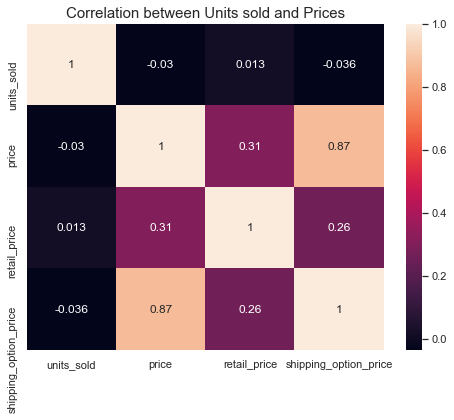

In [25]:
# Correlation between units_sold and price variables

plt.figure(figsize=(8, 6))
summer_price = summer[["units_sold", "price", "retail_price", "shipping_option_price"]]
sns.heatmap(summer_price.corr(), annot=True)
plt.title('Correlation between Units sold and Prices', fontsize=15)
plt.show()

Observations
1. The variable price is normally distributed and the majority of values range between 0 and 20.
2. The variable retail_price is severely right skewed and the majority of values range between 0 and 25, having  much larger variance compared to price.
3. From the KDE plot and ECDF, it is clear that about 30% of retail_price values widely range bewteen about 25 and 250 compared to 30% of price values ranging between about 12.5 and 25.
4. In the violinplot, the majority of values of shipping_option_price range between 1 and 3, which indicates potential correlation with product sales.
5. Surprisingly, none of price variables show strong correlation with units_sold. Rather, there is strong positive correlation between price and shipping price, 0.87, and weak positive correlation between price and retail price, 0.31.

Inspiration
1. Since the price is the actual price for customers to pay and the retail price is the reference price from other stores or websites, a product sells more as the difference between those two price gets bigger?
2. How do these prices relate to the number of unit sold?

### 3.2 Categorical variables: uses_ad_boosts, badges_count, has_urgency_banner

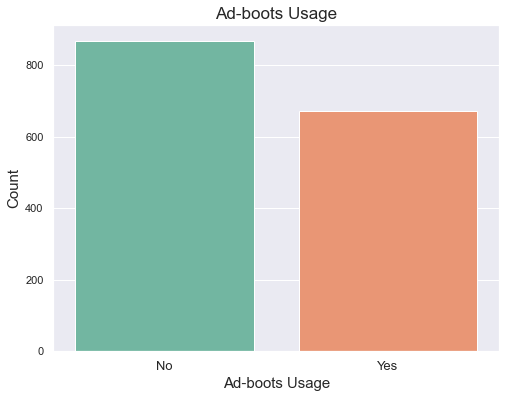

In [26]:
# Count the number of usage of ad boots

plt.figure(figsize=(8, 6))
sns.countplot('uses_ad_boosts', data=summer, palette="Set2")
plt.xlabel('Ad-boots Usage', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks([0, 1], ["No", "Yes"], fontsize=13)
plt.title('Ad-boots Usage', fontsize=17)
plt.show()

In [27]:
# Correlation between units_sold and uses_ad_boosts

corr = summer['uses_ad_boosts'].corr(summer['units_sold'])
print(f"The Correlation coefficient between units_sold and uses_ad_boosts is: {np.round(corr, 4)}")

The Correlation coefficient between units_sold and uses_ad_boosts is: -0.0202


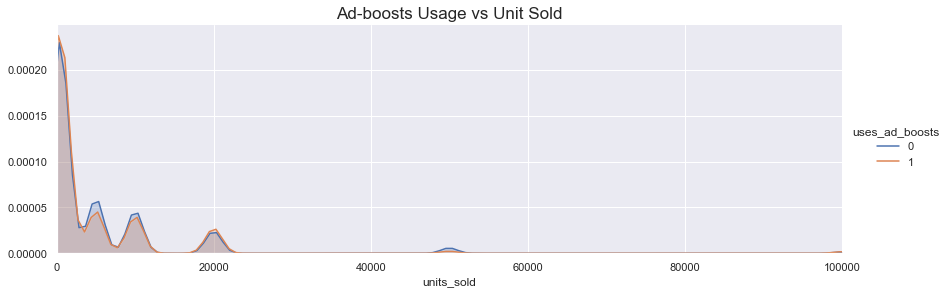

In [28]:
# KDE plot for ad-boosts usage and unit sold

g = sns.FacetGrid(summer, hue='uses_ad_boosts', height=4, aspect=3)

g = (g.map(sns.kdeplot, 'units_sold', shade=True).add_legend())
max_units = summer['units_sold'].max()
g.set(xlim=(0, max_units))
plt.title('Ad-boosts Usage vs Unit Sold', fontsize=17)
plt.show()

Observations

1. Looking at the KDE plot, both lines almost overlap, meaning using ad boosts on a product does not significantly affect its sale. Whether a seller uses an ad boost or not, it does not lead to successful product sales.

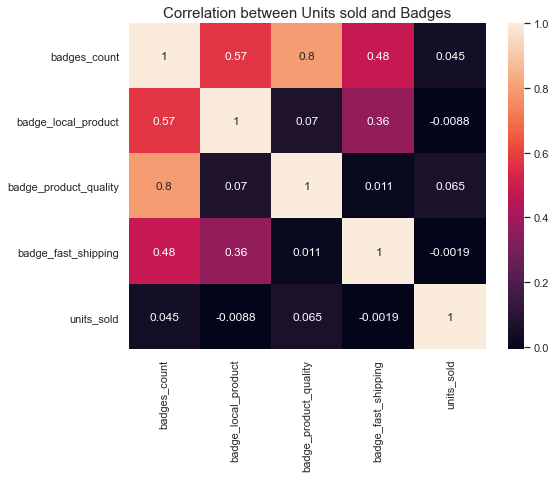

In [29]:
# Correlation between unit sold and badges

plt.figure(figsize=(8, 6))
badge_group = summer[["badges_count", "badge_local_product", 
                      "badge_product_quality", "badge_fast_shipping", "units_sold"]]
sns.heatmap(badge_group.corr(), annot=True)
plt.title('Correlation between Units sold and Badges', fontsize=15)
plt.show()

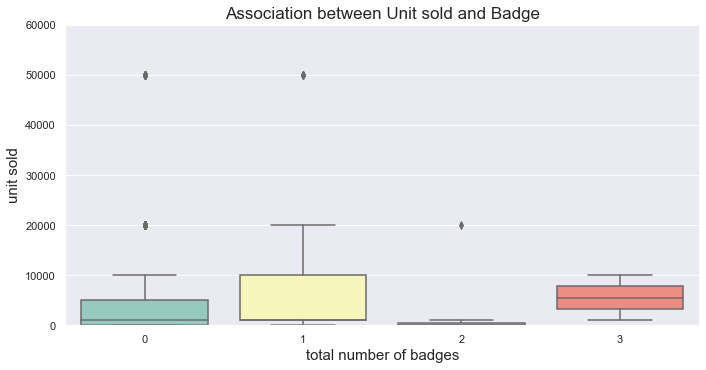

In [30]:
# Association between units sold and badges on product

g = sns.catplot(x="badges_count", y="units_sold", data=summer, 
                kind='box', palette="Set3", aspect=2)
(g.set(ylim=(0, 60000))) 
plt.xlabel("total number of badges", fontsize=15)
plt.ylabel("unit sold", fontsize=15)
plt.title("Association between Unit sold and Badge", fontsize=17)
plt.show()

Observations

1. Unexpectedly, no correlation is found between product sales and all types of badges from the heatmap. The correlations found between badges_count and badge_local_product and between badges_count and badge_fast_shipping are not considered significant as badges_count is simply the sum of any badges a product has. 

2. This non-correlation can be found in the boxplots as well. The number of any badges a product has does not significantly affect the sale of product.

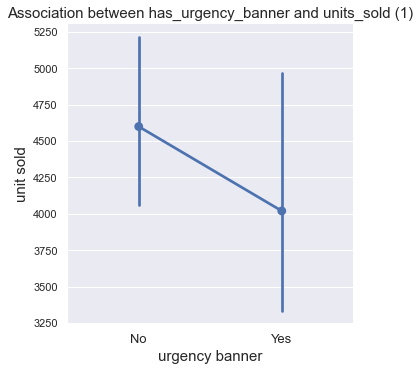

In [31]:
# Association between urgency banner and unit sold
# Use pointplot

sns.catplot(x="has_urgency_banner", y="units_sold", data=summer, kind="point", joint=True)
plt.xlabel("urgency banner", fontsize=15)
plt.ylabel("unit sold", fontsize=15)
plt.xticks([0.0, 1.0], ["No", "Yes"], fontsize=13)
plt.title("Association between has_urgency_banner and units_sold (1)", fontsize=15)
plt.show()

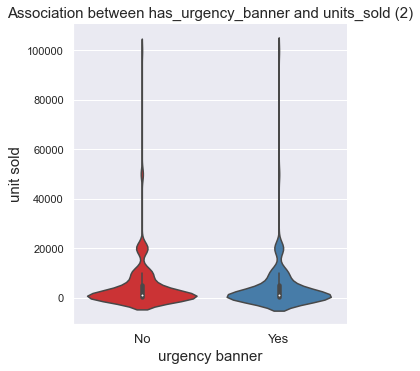

In [32]:
# Use violinplot

sns.catplot(x="has_urgency_banner", y='units_sold', data=summer, kind="violin", palette="Set1")
plt.xlabel("urgency banner", fontsize=15)
plt.ylabel("unit sold", fontsize=15)
plt.xticks([0.0, 1.0], ["No", "Yes"], fontsize=13)
plt.title("Association between has_urgency_banner and units_sold (2)", fontsize=15)
plt.show()

Observations

1. In the pointplot, a point in each line indicates the mean of unit sold in each category. For example, the mean of product sold that has no urgency banner is about 4600. 

2. The line that connects two points in each line allows interaction to be judged by its slope. There is an interaction between two levels. This interaction, however, just reveal an urgency banner has no effect on product sales. Because the product that has the urgency banner shows lower sales. 

3. Looking at the almost identical distribution of values at each level, it is confirmed again the urgency banner has no impact on product sales.

### 3.3 Rating: rating, rating_count, rating_one to five_count

In [33]:
# Define function for range categorization of units_sold

def num_units_sold(units_sold):
    units_sold = int(units_sold)
    
    bracket = ''
    if units_sold in range(0, 100):
        bracket = '< 100'
    if units_sold in range(100, 1000):
        bracket = '100 - 1000'
    if units_sold in range(1000, 5000):
        bracket = '1000 - 5000'
    if units_sold in range(5000, 10000):
        bracket = '5000 - 10000'
    if units_sold in range(10000, 20000):
        bracket = '10000 - 20000'
    if units_sold in range(20000, 50000):
        bracket = '20000 - 50000'
    if units_sold in range(50000, 100000):
        bracket = '> 50000'
    return bracket

In [34]:
# Add up the all counts of each rating level in given range category

summer["num_units_sold"] = summer["units_sold"].apply(num_units_sold)
units_sold = summer['num_units_sold'].unique().tolist()
units_sold_groupby = summer.groupby("num_units_sold").agg({
    'rating_five_count': 'sum',
    'rating_four_count': 'sum',
    'rating_three_count': 'sum',
    'rating_two_count': 'sum',
    'rating_one_count': 'sum'})
units_sold_groupby.reset_index()
units_sold_groupby = units_sold_groupby.iloc[1:]
units_sold_groupby

,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
num_units_sold,,,,,
100 - 1000,7529.0,3151.0,2328.0,1187.0,2264.0
1000 - 5000,54169.0,21729.0,16041.0,7769.0,13459.0
10000 - 20000,164130.0,65087.0,46207.0,21399.0,32677.0
20000 - 50000,226350.0,93245.0,70335.0,33191.0,48738.0
5000 - 10000,90094.0,36015.0,27271.0,13327.0,21971.0
< 100,225.0,89.0,58.0,40.0,47.0
> 50000,88685.0,35783.0,27439.0,12960.0,17576.0


In [35]:
# Check association between rating_#_count and units_sold using barchart

unit_range = ["< 100", "100 - 1000", "1000 - 5000", "5000 - 10000", 
              "10000 - 20000", "20000 - 50000", "> 50000"]
rat_1 = ["47.0", "2264.0", "13459.0", "21971.0", "32677.0", "48738.0", "17576.0"]
rat_2 = ["40.0", "1187.0", "7769.0", "13327.0", "21399.0", "33191.0", "12960.0"]
rat_3 = ["58.0", "2328.0", "16041.0", "27271.0", "46207.0", "70335.0", "27439.0"]
rat_4 = ["89.0", "3151.0", "21729.0", "36015.0", "65087.0", "93245.0", "35783.0"]
rat_5 = ["225.0", "7529.0", "54169.0", "90094.0", "164130.0", "226350.0", "88685.0"]

layout = go.Layout(barmode="stack")

fig = go.Figure(data=[
    go.Bar(x=unit_range, y=rat_5, name="rating_five_count"),
    go.Bar(x=unit_range, y=rat_4, name="rating_four_count"),
    go.Bar(x=unit_range, y=rat_3, name="rating_three_count"),
    go.Bar(x=unit_range, y=rat_2, name="rating_two_count"),
    go.Bar(x=unit_range, y=rat_1, name="rating_one_count")], layout=layout)
iplot(fig)

In [36]:
# define function for categorization of rating

def rating_category(rating):
    rating = int(rating)
    
    bracket = ''
    if rating in range (1, 3):
        bracket = "poor"
    if rating in range (3, 4):
        bracket = "fair"
    if rating in range (4, 6):
        bracket = "good"
    return bracket

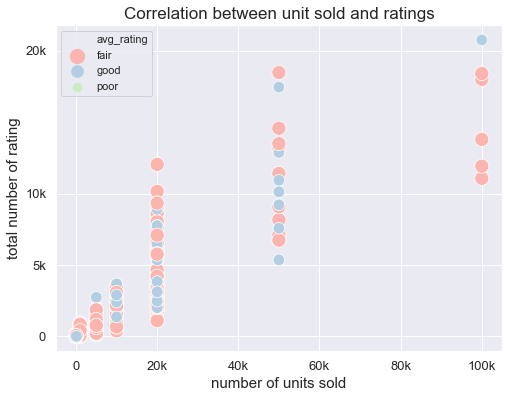

In [37]:
# Correlation between unit sold and ratings using scatterplot

summer["avg_rating"] = summer["rating"].apply(rating_category)

plt.figure(figsize=(8, 6))

sns.scatterplot(x='units_sold', y='rating_count', hue='avg_rating', 
                palette='Pastel1', size='avg_rating', sizes=(10, 200), data=summer)
plt.xlabel("number of units sold", fontsize=15)
plt.ylabel("total number of rating", fontsize=15)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k', '80k', '100k'], 
           fontsize=13)
plt.yticks([0, 5000, 10000, 20000], ['0', '5k', '10k', '20k'], fontsize=13)
plt.title("Correlation between unit sold and ratings", fontsize=17)
plt.show()

Observations

1. Looking at the barchart, there exists correlation between product sales and each rating level. As the range of the number of units sold goes up, the proportion of each rating level increases as well, meaning a product that has a good rating, more than rating 4, sells well. 
2. Noticeably, as a product sells well, a poor rating, less than rating 2, also increases accordingly even if its increase is smaller than that of other rating levels, such as rating 4 or 5.
3. It is assumable that the reason why the range of more than 50k in units sold has much fewer values compared to other range categories is that there might have not been rating evaluation given from customers. However, since the rating 4 and 5 take more than half of the chart, it can conclude that the higher the rating is, the better the product sells.
4. In the scatterplot, the tendency of the positive association can be observed, which means as a product that has a good rating, defined as more than rating 4, sells well and has a much larger total number of ratings.

### 3.4 Merchant factors: merchant_rating_count, merchant_rating, merchant_has_profile_picture

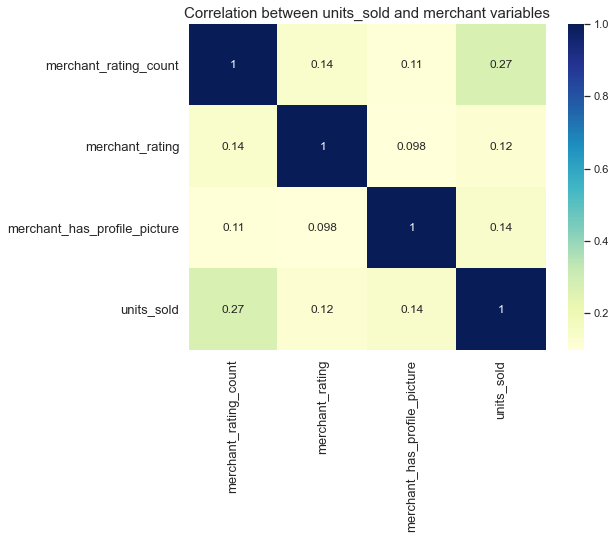

In [38]:
# Correlation coefficient between units_sold and merchant variables 

plt.figure(figsize=(8, 6))
merchant_group = summer[["merchant_rating_count", "merchant_rating", 
                      "merchant_has_profile_picture", "units_sold"]]
sns.heatmap(merchant_group.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation between units_sold and merchant variables', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

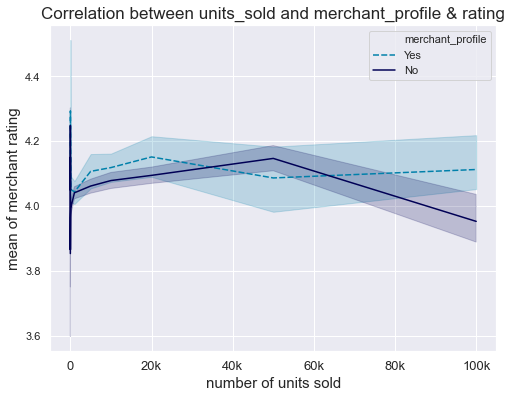

In [39]:
# Correlation between units_sold and merchant_profile & rating using lineplot

summer["merchant_profile"] = summer["merchant_has_profile_picture"].rename().apply(lambda x: "Yes" if x==1 else "No")

plt.figure(figsize=(8, 6))

sns.lineplot(x="units_sold", y="merchant_rating", hue="merchant_profile", hue_order=['Yes', 'No'], 
             style="merchant_profile", palette="ocean_r", data=summer)
plt.xlabel("number of units sold", fontsize=15)
plt.ylabel("mean of merchant rating", fontsize=15)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k', '80k', '100k'], 
           fontsize=13)
plt.title("Correlation between units_sold and merchant_profile & rating", fontsize=17)
plt.show()

In [40]:
# Define function for categorization of merchant_rating

def avg_mer_rating(merchant_rating):
    merchant_rating = int(merchant_rating)
    
    bracket = ''
    if merchant_rating in range (0, 3):
        bracket = "poor"
    if merchant_rating in range (3, 4):
        bracket = "fair"
    if merchant_rating in range (4, 6):
        bracket = 'good'
    return bracket

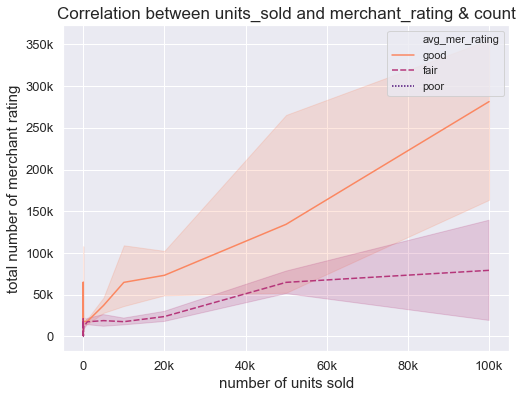

In [41]:
# Correlation between units_sold and merchant rating

summer["avg_mer_rating"] = summer["merchant_rating"].apply(avg_mer_rating)
summer["merchant_profile"] = summer["merchant_has_profile_picture"].rename()

plt.figure(figsize=(8, 6))

sns.lineplot(x="units_sold", y="merchant_rating_count",  hue="avg_mer_rating", style="avg_mer_rating", 
             palette="magma_r", data=summer)
plt.xlabel("number of units sold", fontsize=15)
plt.ylabel("total number of merchant rating", fontsize=15)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k', '80k', '100k'], 
           fontsize=13)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000], 
           ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k'], fontsize=13)
plt.title('Correlation between units_sold and merchant_rating & count', fontsize=17)
plt.show()

Observations

1. Let's look at the heatmap. There are quite weak but positive correlations between units_sold and other merchant variables. 
2. Looking at the first lineplot, interestingly, in the range of the number of units sold between about 35k and 65k, the products without a merchant profile have a higher mean of merchant rating than the products with a merchant profile. Except for this range, it can conclude that customers prefer a product with a merchant profile on, as it assumably provides them with some credibility of the merchant.
3. In the last lineplot, it is observable that there is positive correlation between units_sold and merchant_rating_count, meaning the more merchant ratings a product has, the better the product sells. In addition, a product with a good rating, more than 4 stars, tends to have much more merchant ratings as its sales go up.